In [1]:
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import time
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv("untokenized_df.csv")
print(f"Dataset's shape: {df.shape}")
print(df.columns)

Dataset's shape: (6152, 9)
Index(['index', 'artist', 'lyrics', 'song_name', 'artist_key', 'url',
       'words count', 'unique words count', 'lyricist'],
      dtype='object')


In [3]:
example_song = df.query("song_name == 'לקחת את ידי בידך'")["lyrics"].index[0]
df["lyrics"][example_song]

'<s> לקחת את ידי בידך ואמרת לי: <\\s> <s> בואי נרד אל הגן. <\\s> <s> לקחת את ידי בידך ואמרת לי: <\\s> <s> דברים שרואים משם - לא רואים מכאן <\\s> <s>  <\\s> <s> ניגנת לי שיר על הגיטרה וקולך רעד <\\s> <s> רוח בי קמה, רוח שרה, והזמן כאילו עמד <\\s> <s> ואני עוד זוכרת כל טעם וריח <\\s> <s> את חלקת השדה לאור הירח <\\s> <s> קול התן מן הואדי וכובד הפרי בבוסתן, <\\s> <s> דברים שרואים משם לא רואים מכאן. <\\s> <s>  <\\s> <s> הייתי לבדי ודרכי אבדה לי <\\s> <s> ובאת, באת לי בזמן. <\\s> <s> הייתי לבדי ודרכי אבדה לי <\\s> <s> דברים שרואים משם לא רואים מכאן. <\\s> <s>  <\\s> <s> נתת לי יד, הראית לי דרך להרבה דברים <\\s> <s> הבאת חיוך יפה כמו פרח וכח להאמין. <\\s> <s> ואני עוד זוכרת את השיר ששרת <\\s> <s> את החלק הטוב מכל מה שאמרת. <\\s> <s> היי, מלאך ושטן, התשוב לעצור את הזמן <\\s> <s> דברים שרואים משם לא רואים מכאן. <\\s> '

In [4]:
df["lyrics"] = df["lyrics"].apply(lambda x: x.replace("<s>", "").replace("<\\s>", "</s>").replace("</s></s>", "</s>"))

In [5]:
df["lyrics"][example_song]

' לקחת את ידי בידך ואמרת לי: </s>  בואי נרד אל הגן. </s>  לקחת את ידי בידך ואמרת לי: </s>  דברים שרואים משם - לא רואים מכאן </s>   </s>  ניגנת לי שיר על הגיטרה וקולך רעד </s>  רוח בי קמה, רוח שרה, והזמן כאילו עמד </s>  ואני עוד זוכרת כל טעם וריח </s>  את חלקת השדה לאור הירח </s>  קול התן מן הואדי וכובד הפרי בבוסתן, </s>  דברים שרואים משם לא רואים מכאן. </s>   </s>  הייתי לבדי ודרכי אבדה לי </s>  ובאת, באת לי בזמן. </s>  הייתי לבדי ודרכי אבדה לי </s>  דברים שרואים משם לא רואים מכאן. </s>   </s>  נתת לי יד, הראית לי דרך להרבה דברים </s>  הבאת חיוך יפה כמו פרח וכח להאמין. </s>  ואני עוד זוכרת את השיר ששרת </s>  את החלק הטוב מכל מה שאמרת. </s>  היי, מלאך ושטן, התשוב לעצור את הזמן </s>  דברים שרואים משם לא רואים מכאן. </s> '

In [6]:
print(df["lyrics"][example_song].replace("</s>", "\n"))

 לקחת את ידי בידך ואמרת לי: 
  בואי נרד אל הגן. 
  לקחת את ידי בידך ואמרת לי: 
  דברים שרואים משם - לא רואים מכאן 
   
  ניגנת לי שיר על הגיטרה וקולך רעד 
  רוח בי קמה, רוח שרה, והזמן כאילו עמד 
  ואני עוד זוכרת כל טעם וריח 
  את חלקת השדה לאור הירח 
  קול התן מן הואדי וכובד הפרי בבוסתן, 
  דברים שרואים משם לא רואים מכאן. 
   
  הייתי לבדי ודרכי אבדה לי 
  ובאת, באת לי בזמן. 
  הייתי לבדי ודרכי אבדה לי 
  דברים שרואים משם לא רואים מכאן. 
   
  נתת לי יד, הראית לי דרך להרבה דברים 
  הבאת חיוך יפה כמו פרח וכח להאמין. 
  ואני עוד זוכרת את השיר ששרת 
  את החלק הטוב מכל מה שאמרת. 
  היי, מלאך ושטן, התשוב לעצור את הזמן 
  דברים שרואים משם לא רואים מכאן. 
 


In [7]:
char_count = [len(s) for s in df["lyrics"].tolist()]
char_count = np.array(char_count)
print("Character count statistics:")
print(f"Mean: {char_count.mean()}, Std: {char_count.std()}, Min: {char_count.min()}, Max: {char_count.max()}")

song_lengths = [len(s.strip().split(" ")) for s in df["lyrics"].tolist()]
song_lengths = np.array(song_lengths)
print("Song word count statistics:")
print(f"Mean: {song_lengths.mean()}, Std: {song_lengths.std()}, Min: {song_lengths.min()}, Max: {song_lengths.max()}")

Character count statistics:
Mean: 810.8485045513654, Std: 407.66950027865903, Min: 78, Max: 4730
Song word count statistics:
Mean: 192.0227568270481, Std: 92.62800759824034, Min: 15, Max: 1051


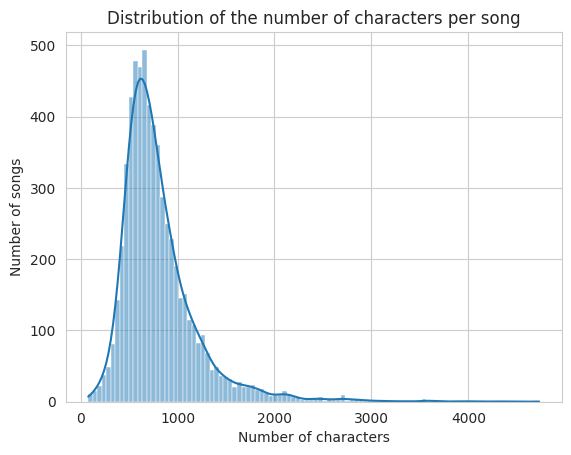

In [8]:
sns.histplot(char_count, bins=100, kde=True)
plt.title("Distribution of the number of characters per song")
plt.xlabel("Number of characters")
plt.ylabel("Number of songs")
plt.show()

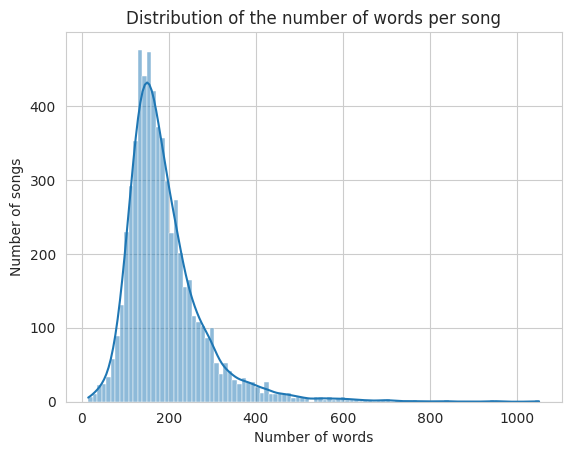

In [9]:
sns.histplot(song_lengths, bins=100, kde=True)
plt.title("Distribution of the number of words per song")
plt.xlabel("Number of words")
plt.ylabel("Number of songs")
plt.show()

## Using API to segment the songs

We use the API provided by https://www.langndata.com/heb_parser to segment the lyrics.
It uses [YAP](https://github.com/onlplab/yap), a tool written in Go, with the following features:
- Tokenizer

- Segmentation

- Lemmas

- Part-of-speech

- Dependency tree

- Morphological analyzer

- Lattices

YAP is based on the work of Amir More and Amit Seker, developed at the ONLP research lab and led by Dr. Reut Tsarfaty, from the Department of Computer Science and Engineering, Bar-Ilan University.


The API is free to use, but requires registration, and has the following limitations:
1. 1 call per 3 seconds
2. 250 words max per call
3. Request length cannot exceed 1024 characters

In [10]:
print(f"Number of songs with more than 1024 characters: {np.sum(char_count > 1024)}")
print(f"Number of songs with more than 250 words: {np.sum(song_lengths > 250)}")
print(
    f"Number of songs with more than 1024 characters or 250 words: {np.sum(np.logical_or(char_count > 1024, song_lengths > 250))}")

Number of songs with more than 1024 characters: 1198
Number of songs with more than 250 words: 1091
Number of songs with more than 1024 characters or 250 words: 1228


In [11]:
API_token = "5e269f277bfcf9837ccd16181afe9fe0"

In [12]:
text = df["lyrics"][example_song]
# Escape double quotes in JSON.
text = text.replace(r'"', r'\"')
url = f'https://www.langndata.com/api/heb_parser?token={API_token}'
_json = '{"data":"' + text + '"}'
headers = {'content-type': 'application/json'}
r = requests.post(url, data=_json.encode('utf-8'), headers={'Content-type': 'application/json; charset=utf-8'})
print(f"Tokenized text: {r.json()['tokenized_text']}")
print(f"Segmented text: {r.json()['segmented_text']}")
print(f"lemmatized text: {r.json()['lemmas']}")

Tokenized text: לקחת את ידי בידך ואמרת לי בואי נרד אל הגן . לקחת את ידי בידך ואמרת לי דברים שרואים משם לא רואים מכאן ניגנת לי שיר על הגיטרה וקולך רעד רוח בי קמה , רוח שרה , והזמן כאילו עמד ואני עוד זוכרת כל טעם וריח את חלקת השדה לאור הירח קול התן מן הואדי וכובד הפרי בבוסתן , דברים שרואים משם לא רואים מכאן . הייתי לבדי ודרכי אבדה לי ובאת , באת לי בזמן . הייתי לבדי ודרכי אבדה לי דברים שרואים משם לא רואים מכאן . נתת לי יד , הראית לי דרך להרבה דברים הבאת חיוך יפה כמו פרח וכח להאמין . ואני עוד זוכרת את השיר ששרת את החלק הטוב מכל מה שאמרת . היי , מלאך ושטן , התשוב לעצור את הזמן דברים שרואים משם לא רואים מכאן .
Segmented text: לקחת את ידי ב ידך ו אמרת ל אני בואי נרד אל ה גן . לקחת את ידי ב ידך ו אמרת ל אני דברים ש רואים משם לא רואים מ כאן ניגנת ל אני שיר על ה גיטרה ו קולך רעד רוח ב אני קמה , רוח שרה , ו ה זמן כאילו עמד ו אני עוד זוכרת כל טעם ו ריח את חלקת ה שדה לאור ה ירח קול ה תן מן ה ואדי ו כובד ה פרי ב ה בוסתן , דברים ש רואים משם לא רואים מ כאן . הייתי לבדי ו דרכי אבדה ל אני ו ב את , באת ל

In [13]:
next_time_to_sleep = time.time() + 3.1

def split_lyrics(lyrics):
    words = lyrics.split(" ")

    chunks = []
    current_chunk = []
    current_chunk_chars_count = 0
    current_chunk_words_count = 0
    for word in words:
        if (current_chunk_chars_count + len(word) + 1 >= 1020) or current_chunk_words_count >= 240:
            chunks.append(" ".join(current_chunk))
            current_chunk = []
            current_chunk_chars_count = 0
            current_chunk_words_count = 0
        else:
            current_chunk.append(word)
            current_chunk_chars_count += len(word) + 1
            current_chunk_words_count += 1

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks


def segment_text(text):
    if text == "":
        return ""
    text = text.replace(r'"', r'\"')
    url = f'https://www.langndata.com/api/heb_parser?token={API_token}'
    _json = '{"data":"' + text + '"}'
    headers = {'content-type': 'application/json'}
    global next_time_to_sleep
    if next_time_to_sleep > time.time():
        time.sleep(next_time_to_sleep - time.time())
    r = requests.post(url, data=_json.encode('utf-8'), headers={'Content-type': 'application/json; charset=utf-8'})
    next_time_to_sleep = time.time() + 3.1
    if "segmented_text" not in r.json():
        print(f"Error: {text, r.json()}")
        return ""
    return r.json()["segmented_text"]

In [14]:
res = split_lyrics(df.query("song_name == 'ליל חניה'")["lyrics"].values[0])
print(f"Number of chunks: {len(res)}")
print(f"Number of characters in the first chunk: {len(res[0])}")
print(f"Number of words in the first chunk: {len(res[0].split(' '))}")
print(f"Number of characters in the second chunk: {len(res[1])}")
print(f"Number of words in the second chunk: {len(res[1].split(' '))}")
" ".join([segment_text(chunk) for chunk in res])

Number of chunks: 2
Number of characters in the first chunk: 1017
Number of words in the first chunk: 235
Number of characters in the second chunk: 388
Number of words in the second chunk: 93


'ליל חניה . ב קול דברים , ב ה שחוק , בגדף ב המולת מלאכות הוא קם , הנה הנו כמו פני עיר נבנית פניו של שדה ה קטל ב התפרש ה מחנה אשר דינו להיות שופך דם ה אדם ו מגינו . ליל חניה , ליל זמר , ליל שחקים רקוע ליל רוב מלאכות חופזות , ליל אד מן ה דוודים ליל ש מוסך את כישופה של רעות רוח ב בניינה של ממלכה , ליל נדודים ניצב פרוש על ה יחיד ו ה גדודים . מתוך אשמורת ראשונה , בין חוף ו גבע היה נשקף פתאום מראה ה מלחמה כמו ה ווי צוען , חבור יתד ו חבל ב הוא חירותם של מסעות ו חירומם ב הוא הכלים ו ה חוקות ב עירומם . ליל חניה , ליל זמר ... ב הוא מליצת סיסמות ה זמן , אשר לא פרק שירה צרופה בן יעסוק , חלילה ל הוא ו רק ה זמר ה נפוץ , ש לא דבר ערך ו לא שכיית חמדה הוא , יישאן ב מלוא צווחת צבעיו ה חריפים על חלילו . על אהבה הוא מדבר ב היא הוא פותח ו על חובה ו קרב ו עול , הכל ב כל אין הוא אומר את זאת ב כל דקויותיה של ה שירה , אבל אומר ב קול גדול בלי מורך לב ו בלי חשש מפני ה זול . ליל חניה , ליל זמר ... עת גם צלם ה דברים ה אלה היה צלמה ל קול זמרת פזמון תועה עוד ימשכו ה מה כמו נימה מ חלב נפשו של דור , גם ב שדה זרועה לזכ

In [ ]:
tqdm.pandas()
df["lyrics"] = df["lyrics"].progress_apply(lambda x: x.replace("</s>", "רצףסוףמשפט"))
df["lyrics_chunks"] = df["lyrics"].progress_apply(split_lyrics)
df["segmented_lyrics"] = df["lyrics_chunks"].progress_apply(lambda x: " ".join([segment_text(chunk) for chunk in x]))


  0%|          | 0/6152 [00:00<?, ?it/s]

  0%|          | 0/6152 [00:00<?, ?it/s]

  0%|          | 0/6152 [00:00<?, ?it/s]

In [ ]:
df["lyrics"] = df["segmented_lyrics"].apply(lambda x: x.replace("רצףסוףמשפט", "</s>"))